In [1]:
import pandas as pd
from termcolor import colored
import tensorflow as tf
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        
import csv
import keras
import seaborn as sns

from keras.models import Sequential  
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten # some layers omitted
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
# Import experimental data
exp_data = 'train.csv'
raw_dataset = pd.read_csv(exp_data,
                          na_values='?', comment=',',
                          sep=',', header=0) # header is row 0
print(raw_dataset.head())
print(len(raw_dataset)) # print number of rows
print(len(raw_dataset.columns)) # print number of columns

   Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1   

In [4]:
# Check for NA
# print(raw_dataset.isna().sum())
# print(test_dataset.isna().sum())

# Remove NA; no NA found
raw_dataset_no_na = raw_dataset.dropna()
print(len(raw_dataset_no_na))
print(len(raw_dataset_no_na.columns))

3751
1777


Text(0.5, 0, 'Activity value')

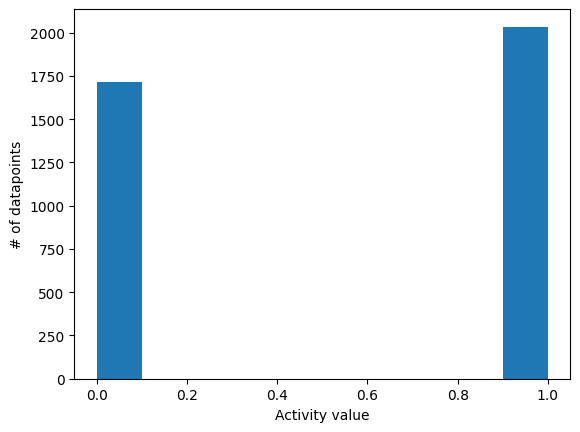

In [5]:
# Histogram shows Activity value is either 0 or 1 (and nothing in between)
# This shows the model should be a classification model (to predict whether Activity is 0 or 1)
plt.hist(raw_dataset['Activity'])
plt.ylabel('# of datapoints')
plt.xlabel('Activity value')

In [6]:
# Separate by Activity = 0 and Activity = 1
activity_0 = raw_dataset.loc[raw_dataset['Activity'] == 0 ]
activity_1 = raw_dataset.loc[raw_dataset['Activity'] == 1 ]

print(activity_0)
print(activity_1)

      Activity        D1        D2    D3    D4        D5        D6        D7  \
4            0  0.100000  0.517794  0.00  0.00  0.494734  0.781422  0.154361   
5            0  0.133333  0.771035  0.20  0.25  0.122153  0.677398  0.267224   
9            0  0.100000  0.768150  0.10  0.25  0.262299  0.598972  0.377065   
11           0  0.166667  0.563907  0.00  0.25  0.254419  0.756516  0.228250   
19           0  0.033300  0.675038  0.10  0.00  0.235896  0.657470  0.212516   
...        ...       ...       ...   ...   ...       ...       ...       ...   
3742         0  0.200000  0.583884  0.05  0.00  0.138530  0.740136  0.170377   
3743         0  0.133333  0.765646  0.15  0.00  0.354546  0.564943  0.220880   
3744         0  0.033300  0.500483  0.00  0.00  0.390184  0.734103  0.236868   
3748         0  0.200000  0.520564  0.00  0.00  0.179949  0.768785  0.177341   
3750         0  0.133333  0.533952  0.00  0.00  0.347966  0.757971  0.230667   

            D8        D9  ...  D1767  D

           count      mean       std       min       25%       50%       75%  \
Activity  1717.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
D1        1717.0  0.084469  0.086652  0.000000  0.033300  0.066700  0.100000   
D2        1717.0  0.579853  0.105104  0.282128  0.506263  0.574079  0.650085   
D3        1717.0  0.053873  0.070325  0.000000  0.000000  0.050000  0.100000   
D4        1717.0  0.044554  0.127090  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
D1772     1717.0  0.015143  0.122156  0.000000  0.000000  0.000000  0.000000   
D1773     1717.0  0.008736  0.093085  0.000000  0.000000  0.000000  0.000000   
D1774     1717.0  0.011066  0.104641  0.000000  0.000000  0.000000  0.000000   
D1775     1717.0  0.012813  0.112500  0.000000  0.000000  0.000000  0.000000   
D1776     1717.0  0.008736  0.093085  0.000000  0.000000  0.000000  0.000000   

               max  
Activity  0.000000

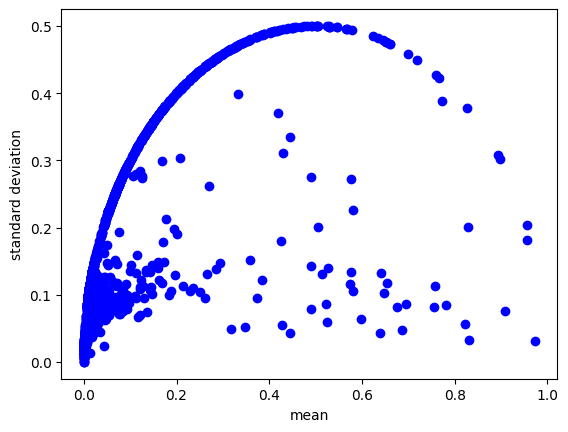

Text(0.5, 0, 'standard deviation values')

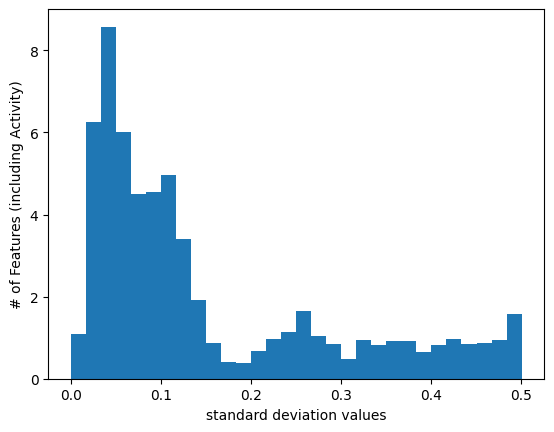

In [7]:
# Activity 0 summary stats
activity_0_summary = activity_0.describe().transpose()
print(activity_0_summary)

# Scatterplot
plt.scatter(activity_0_summary['mean'], activity_0_summary['std'], c ="blue")
plt.ylabel('standard deviation')
plt.xlabel('mean')
plt.show()

# Histogram of standard deviation
plt.hist(activity_0_summary['std'], density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features (including Activity)')
plt.xlabel('standard deviation values')

           count      mean       std       min      25%       50%       75%  \
Activity  2034.0  1.000000  0.000000  1.000000  1.00000  1.000000  1.000000   
D1        2034.0  0.070599  0.073322  0.000000  0.03330  0.066700  0.100000   
D2        2034.0  0.603059  0.105357  0.358867  0.53285  0.597146  0.679735   
D3        2034.0  0.080187  0.082766  0.000000  0.00000  0.050000  0.100000   
D4        2034.0  0.034292  0.105308  0.000000  0.00000  0.000000  0.000000   
...          ...       ...       ...       ...      ...       ...       ...   
D1772     2034.0  0.018191  0.133674  0.000000  0.00000  0.000000  0.000000   
D1773     2034.0  0.015241  0.122540  0.000000  0.00000  0.000000  0.000000   
D1774     2034.0  0.012291  0.110209  0.000000  0.00000  0.000000  0.000000   
D1775     2034.0  0.026549  0.160800  0.000000  0.00000  0.000000  0.000000   
D1776     2034.0  0.013274  0.114475  0.000000  0.00000  0.000000  0.000000   

               max  
Activity  1.000000  
D1       

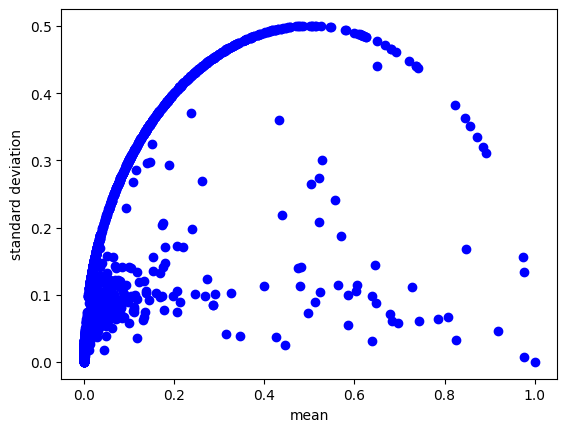

Text(0.5, 0, 'standard deviation values')

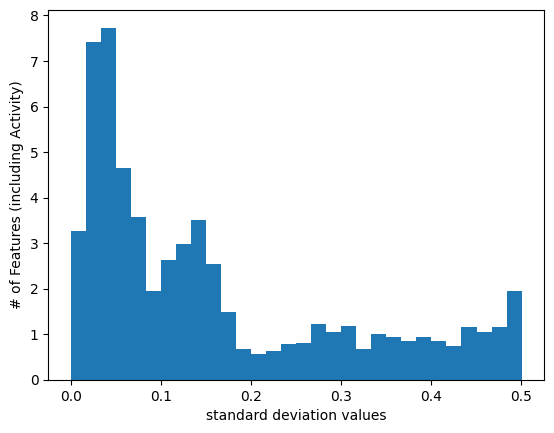

In [8]:
# Activity 1 summary stats
activity_1_summary = activity_1.describe().transpose()
print(activity_1_summary)

# Scatterplot
plt.scatter(activity_1_summary['mean'], activity_1_summary['std'], c ="blue")
plt.ylabel('standard deviation')
plt.xlabel('mean')
plt.show()

# Histogram
plt.hist(activity_1_summary['std'], density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features (including Activity)')
plt.xlabel('standard deviation values')

In [55]:
# Split training dataset into training and testing dataset
train_dataset = raw_dataset.sample(frac=0.8)
test_dataset = raw_dataset.drop(train_dataset.index)

# Split features (x_train) and variable (y_train)
x, y = train_dataset.filter(regex='^D'), train_dataset.filter(regex='Activity')
x_test, y_test = test_dataset.filter(regex='^D'), test_dataset.filter(regex='Activity')

print(x)
print(y)

            D1        D2    D3    D4        D5        D6        D7        D8  \
531   0.000000  0.459843  0.00  0.00  0.152878  0.794246  0.192011  0.635073   
3703  0.100000  0.587343  0.05  0.00  0.097300  0.652757  0.280668  0.585445   
1049  0.066700  0.494577  0.05  0.00  0.321005  0.814018  0.123530  0.067800   
2223  0.100000  0.532231  0.00  0.00  0.228485  0.769064  0.207816  0.420581   
1630  0.100000  0.665270  0.10  0.25  0.280790  0.725941  0.179690  0.201782   
...        ...       ...   ...   ...       ...       ...       ...       ...   
1296  0.066700  0.643551  0.05  0.25  0.163023  0.695472  0.245799  0.483765   
2440  0.000000  0.409833  0.00  0.25  0.320324  0.762966  0.223939  0.240965   
3610  0.133333  0.623502  0.20  0.00  0.109087  0.703147  0.158624  0.545554   
1851  0.033300  0.732911  0.05  0.00  0.186170  0.636618  0.329725  0.672813   
2706  0.033300  0.549618  0.05  0.00  0.138285  0.762433  0.164070  0.385759   

            D9       D10  ...  D1767  D

Text(0.5, 0, 'Correlation values')

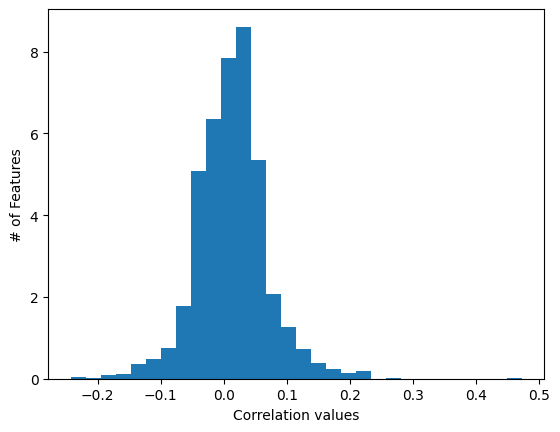

In [56]:
# Identify which features are correlated with Activity
# 1. Calculate correlation for each Feature to Activity
# 2. Then plot histogram of correlation values

plot_input = [] # list to store correlation values
correlated_features = [] # list to store slightly correlated features

# For each Feature (column) in x_data, calculate correlation to Variable ("Activity")
for col in x.columns: # col is the column name in x_data

    # Calculate correlation between Activity (y-value) and Feature (x-value)
    corr_res = train_dataset['Activity'].corr(train_dataset[col])

    # Append correlation value to plot_input vector
    plot_input.append(corr_res)

    # If correlation is less than -0.2 or greater than 0.2, print Feature name and correlation value
    if corr_res >= 0.15 or corr_res <= -0.15:
        # print(col, corr_res)
        correlated_features.append(col) # save slightly correlated features to list


# Histogram of correlation values
plt.hist(plot_input, density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features')
plt.xlabel('Correlation values')

In [70]:
# Model
# Split training dataset; 80% training, 20% validating
x_train, x_valid, y_train, y_valid = train_test_split(x[correlated_features], y, test_size=0.2, shuffle=True)

# Number of features
num_features = len(correlated_features)
print(num_features)

model = Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[num_features]),
    layers.Dropout(0.5),
    layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(20, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Test prediction command work 
model.predict(x_train[correlated_features])

42
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                2752      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 20)                660       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_46 (Dense)            (None, 1)            

array([[0.33963898],
       [0.3397323 ],
       [0.34094745],
       ...,
       [0.34102714],
       [0.33991903],
       [0.34090525]], dtype=float32)

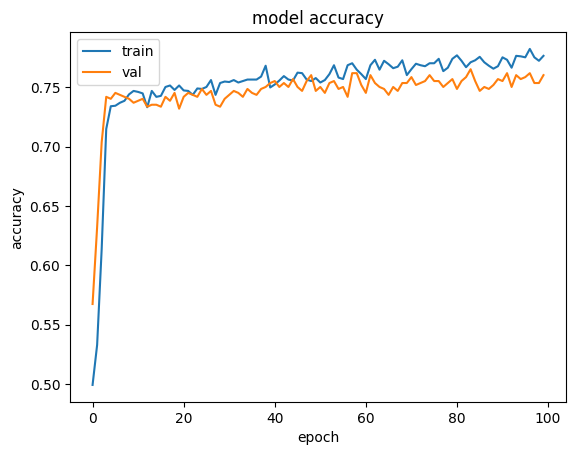

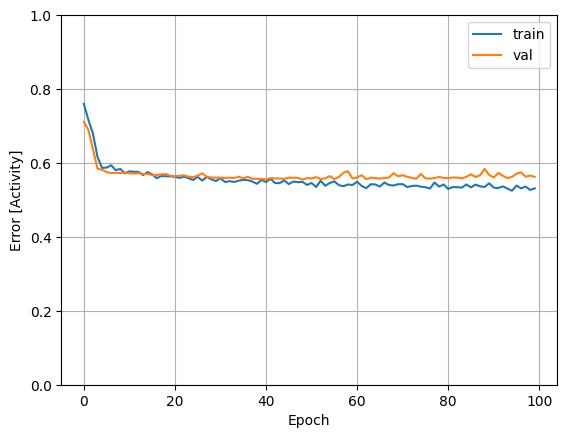

In [71]:
# Train model
history = model.fit(
    x=x_train, 
    y=y_train, 
    epochs=100, 
    verbose=0,
    validation_data=(x_valid, y_valid))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Activity]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

24/24 [==============================] - 0s 2ms/step
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]
[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]
[0.]
[1.]


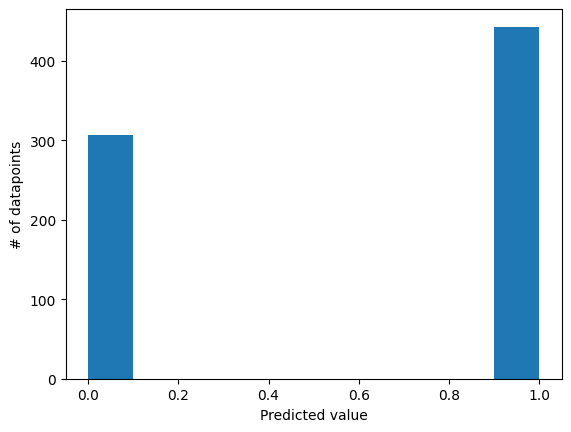

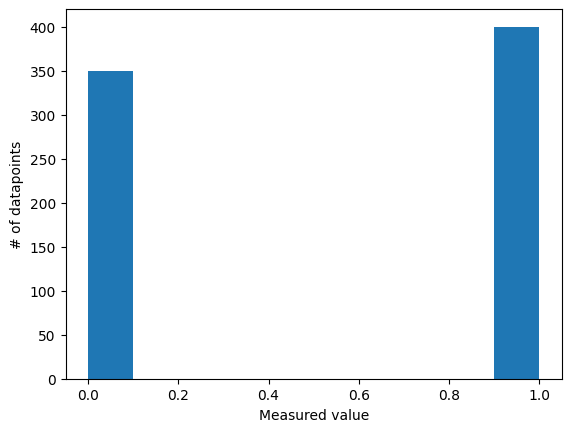

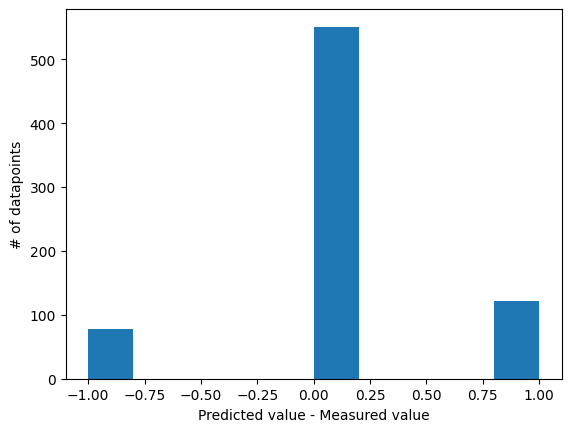

In [72]:
# Plot predicted Activity vs measured Activity
plot_input_y_test = np.array(y_test) # convert y_test (measured Activity values) to numpy array
pred_test = model.predict(x_test[correlated_features]) # predict Activity in test dataset
pred_test = np.round(pred_test) # round predictions to boolean 0 or 1
print(plot_input_y_test[:10])
print(pred_test[:10])
print(min(pred_test))
print(max(pred_test))


plt.hist(pred_test) 
plt.ylabel('# of datapoints')
plt.xlabel('Predicted value')
plt.show()

plt.hist(plot_input_y_test)
plt.ylabel('# of datapoints')
plt.xlabel('Measured value')
plt.show()


plot_input = pred_test - plot_input_y_test
plt.hist(plot_input)  # density=False would make counts
plt.ylabel('# of datapoints')
plt.xlabel('Predicted value - Measured value')
plt.show()

         D1        D2    D3   D4        D5        D6        D7        D8  \
0  0.366667  0.611765  0.05  0.0  0.110435  0.803973  0.106075  0.473965   
1  0.100000  0.758175  0.30  0.0  0.180128  0.621378  0.287144  0.503919   
2  0.100000  0.658812  0.10  0.0  0.243421  0.640959  0.312765  0.279784   
3  0.100000  0.655752  0.10  0.0  0.226978  0.776996  0.150657  0.336948   
4  0.000000  0.484851  0.00  0.0  0.561200  0.771463  0.244287  0.293096   

         D9       D10  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.835617  0.106452  ...      1      1      1      1      0      1      0   
1  0.674919  0.403616  ...      0      0      0      0      0      0      0   
2  0.686775  0.280301  ...      0      0      0      0      0      0      0   
3  0.802121  0.125608  ...      0      0      0      0      0      0      0   
4  0.717575  0.230842  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      1      0  
1      0      0   

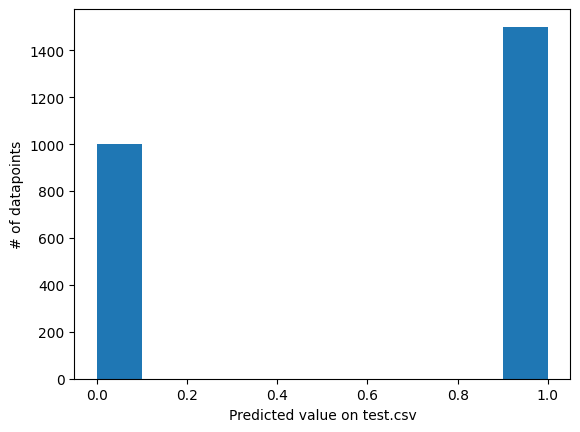

In [83]:
# Import test data
test_data = 'test.csv'
test_dataset = pd.read_csv(test_data,
                          na_values='?', comment=',',
                          sep=',', header=0) # header is row 0
# print(raw_dataset.head())
print(test_dataset.head())
print(len(test_dataset))
print(len(test_dataset.columns))

# Remove NA 
test_dataset_no_na = test_dataset.dropna()
# print(len(test_dataset_no_na))
# print(len(test_dataset_no_na.columns))

# Predict on test dataset
pred_test = model.predict(test_dataset[correlated_features])
pred_test = np.round(pred_test) # round predictions to boolean 0 or 1
print(pred_test)

plt.hist(pred_test) 
plt.ylabel('# of datapoints')
plt.xlabel('Predicted value on test.csv')
plt.show()